In [1]:
from PIL import Image
import imagehash
import cv2
import numpy as np
import math
import os
import json
import time
import bs4
import requests
from seleniumbase import SB
from tqdm import tqdm

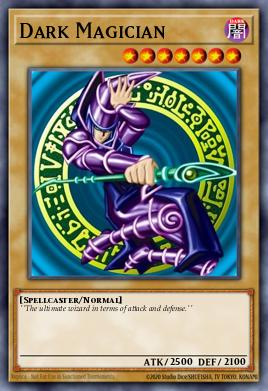

In [55]:
image = Image.open("./datasets/ygoprodeck/Dark-Magician-0-46986414/46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
image

In [43]:
image = cv2.imread("./datasets/cardmarket/Dark-Magician-0-46986414/MSP-707046.jpg")
image = cv2.resize(image, (268, 391), interpolation=cv2.INTER_LINEAR)
image = image[350:360, 60:200]
cv2.imshow("", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
[np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2])]

[80.34142857142857, 80.80357142857143, 238.22642857142858]

In [41]:
ref = [80, 80, 240]

In [42]:
math.dist(ref, [np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2])])

0.5730631754538247

In [63]:
hash = imagehash.average_hash(image)

In [61]:
otherimage = Image.open("./datasets/Zouloux/Dark-Magician-0-46986414/DUSA-FR100-46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
otherhash = imagehash.average_hash(otherimage)

In [64]:
print(hash - otherhash)

6


In [78]:
image = Image.open("./datasets/ygoprodeck/Dark-Magician-0-46986414/46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
hash = imagehash.average_hash(image, 32)
phash = imagehash.phash(image, 32)
otherimage = Image.open("./datasets/Zouloux/Dark-Magician-0-46986414/DUSA-FR100-46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
otherhash = imagehash.average_hash(otherimage, 32)
otherphash = imagehash.phash(otherimage, 32)
(hash - otherhash) + (phash - otherphash)

322

In [79]:
image = Image.open("./datasets/ygoprodeck/Dark-Magician-0-46986414/46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
hash = imagehash.average_hash(image, 32)
phash = imagehash.phash(image, 32)
otherimage = Image.open("./datasets/Zouloux/Dark-Magician-2-46986414/LEDD-FRA01-46986414.jpg").resize((268, 391), Image.Resampling.LANCZOS)
otherhash = imagehash.average_hash(otherimage, 32)
otherphash = imagehash.phash(otherimage, 32)
(hash - otherhash) + (phash - otherphash)

632

In [34]:
subdirs, dirs, files = next(iter(os.walk("datasets/cardmarket/")))

In [39]:
dir1 = dirs[3]
dir2 = dirs[4]

In [43]:
"-".join(dir2.split("-")[:-2])

'Burning-Soul'

In [45]:
name = next(iter(os.listdir("datasets/cardmarket/Dark-Magician-0-46986414")))

In [47]:
input_path = "./card_sets_augmented.json"

with open(input_path, "rb") as f:
    card_sets = json.load(f)

In [49]:
name.split('-')[0]

'SYE'

In [54]:
card_sets['Dark-Magician-0-46986414']

['CT13-FR003',
 'CT14-FR001',
 '25TH-FR001',
 'BPT-001',
 'BPT-007',
 'DB1-FR102',
 'DLG1-FR004',
 'DUPO-FR101',
 'DTP1-FR002',
 'DTP1-FR002',
 'DT01-FR002',
 'DL11-FR001',
 'DPBC-FR008',
 'DPYG-FR001',
 'DUSA-FR100',
 'FL1-FR002',
 'GFTP-FR128',
 '2021-FR001',
 'LOB-005',
 'LOB-E003',
 'LOB-FR005',
 'LC01-FR005',
 'LCYW-FR001',
 'LDK2-FRY10',
 'LEDD-FRA01',
 'MAGO-FR002',
 'RA03-FR080',
 'RA03-FR080',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RA04-FR001',
 'RP01-FR003',
 'JUMP-FR049',
 'SS01-FRA01',
 'SS04-FRA01',
 'STP1-FR001',
 'SBCB-FR001',
 'SBCB-FR001',
 'SDY-006',
 'SDY-E005',
 'SYE-001',
 'YSYR-FR001',
 'YSYR-FR001',
 'SD6-FR003',
 'SDMY-FR010',
 'JMPS-FR003',
 'DDS-002',
 'PCY-004',
 'PCY-E004',
 'MVP1-FR054',
 'MVP1-FRS54',
 'MVP1-FRSV3',
 'MVP1-FRSE3',
 'MVP1-FRG54',
 'MVP1-FRGV3',
 'YGLD-FRA03',
 'YGLD-FRC09']

In [57]:
card_sets['Dark-Magician-0-46986414'][-17].startswith(name.split('-')[0])

True

In [61]:
yes = False
for i, expansion in enumerate(card_sets['Dark-Magician-0-46986414']):
    yes = yes or expansion.startswith(name.split('-')[0])
yes

True

In [75]:
name = "Shooting-Star-Dragon-T.G.-EX-0-63180841"
name = "-".join(name.split("-")[:-2])

In [76]:
name

'Shooting-Star-Dragon-T.G.-EX'

In [77]:
name = name.replace('"', '').replace("'", "")
name = name.replace('---', '-').replace(".", "").replace(',', '').replace("'", "")
name

'Shooting-Star-Dragon-TG-EX'

In [7]:
name = "Ash-Blossom-Joous-Spring-0-46986414"
with SB(uc=True, headless=True) as sb:
    search_string = "-".join(name.split("-")[:-2])
    search_string = search_string.replace('"', '').replace("'", "")
    search_string = search_string.replace('---', '-').replace(".", "").replace(',', '').replace("'", "")
    sb.open(f"https://www.cardmarket.com/en/YuGiOh/Cards/{search_string}/Versions")
    # sb.wait_for_element("select", timeout=10)
    time.sleep(3)

    if sb.is_element_visible('button[class="btn btn-outline-primary"]'):
        sb.click('button[class="btn btn-outline-primary"]')
        time.sleep(3)

        scroll_pause = 1  # seconds to wait after each scroll
        scroll_step = 1000  # pixels to scroll each time (you can tweak this)

        # Get initial height
        total_height = sb.driver.execute_script("return document.body.scrollHeight")
        current_position = 0

        while current_position < total_height:
            sb.driver.execute_script(f"window.scrollTo(0, {current_position});")
            time.sleep(scroll_pause)  # Wait for images to lazy load
            current_position += scroll_step

            # Recalculate in case content was added dynamically
            total_height = sb.driver.execute_script("return document.body.scrollHeight")

        # Finally scroll to bottom to be safe
        sb.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)

        # Now you can get everything
    page = sb.get_page_source()
    soup = bs4.BeautifulSoup(page, features="lxml")

True


In [5]:
page

'<html lang="en" data-bs-theme="dark" data-browser="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36"><head><meta charset="utf-8"><!-- Google Tag Manager --><script src="https://connect.facebook.net/signals/config/195574354216252?v=2.9.194&amp;r=stable&amp;domain=www.cardmarket.com&amp;hme=3469cd2310bfdef0792a05d8d61fe44de3551987a5200ece9665feac8460097d&amp;ex_m=72%2C128%2C113%2C117%2C63%2C5%2C106%2C71%2C17%2C101%2C93%2C52%2C56%2C182%2C185%2C197%2C193%2C194%2C196%2C30%2C107%2C54%2C79%2C195%2C177%2C180%2C190%2C191%2C198%2C139%2C42%2C203%2C200%2C201%2C35%2C152%2C16%2C51%2C207%2C206%2C141%2C19%2C41%2C1%2C44%2C67%2C68%2C69%2C73%2C97%2C18%2C15%2C100%2C96%2C95%2C114%2C53%2C116%2C40%2C115%2C31%2C98%2C27%2C178%2C181%2C149%2C12%2C13%2C14%2C7%2C8%2C26%2C23%2C24%2C59%2C64%2C66%2C77%2C55%2C105%2C108%2C28%2C78%2C10%2C9%2C82%2C49%2C22%2C110%2C109%2C111%2C102%2C11%2C21%2C3%2C39%2C76%2C20%2C161%2C88%2C135%2C29%2C75%2C0%2C99%2C58%2C86%2C34%2C84%2C85%

In [150]:
img_html_tags = soup.find_all('div', {"class": "image card-image is-yugioh is-sharp"})

src = []
for i, tag in enumerate(img_html_tags):
    src.append(tag.find('img').attrs['src'])

'/img/transparent.gif' in src

False

In [146]:
src

['https://product-images.s3.cardmarket.com/5/RA04/821153/821153.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821152/821152.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821151/821151.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821150/821150.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/821149/821149.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820968/820968.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820967/820967.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820966/820966.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820965/820965.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820964/820964.jpg',
 'https://product-images.s3.cardmarket.com/5/RA04/820695/820695.jpg',
 'https://product-images.s3.cardmarket.com/5/QCAC/813537/813537.jpg',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/transparent.gif',
 '/img/tra

In [109]:
img_html_tags[0].find('img').attrs['src']

'https://product-images.s3.cardmarket.com/5/RA04/821153/821153.jpg'

In [8]:
from scrapping import format_search

format_search("Ash-Blossom-&-Joyous-Spring-0-14558127")

'Ash-Blossom--Joyous-Spring-0-14558127'

In [29]:
with open("cardinfo.json", "rb") as f:
    cardinfo = json.load(f)

with open("wrong_format.json", "rb") as f:
    wrong_format = json.load(f)

In [30]:
for data in cardinfo["data"]:
    name = f"{data["name"].replace(" ", "-")}-0-{str(data["id"])}"
    if name in wrong_format:
        wrong_format[name] = data["name"].replace("-", "").replace(" ", "-")

In [31]:
with open("right_format.json", "w") as json_file:
    json.dump(wrong_format, json_file)

In [28]:
for data in cardinfo["data"]:
    name = f"{data["name"].replace(" ", "-")}-0-{str(data["id"])}"
    if name == "Thousand-Eyes-Idol-0-27125110":
        print(True)
        break
    # if name in wrong_format:
    #     wrong_format[name] = data["name"].replace("-", "").replace(" ", "-")

True


In [3]:
ygoprodeck = os.listdir("./datasets/ygoprodeck")
zouloux = os.listdir("./datasets/Zouloux")

In [12]:
with open("card_sets_augmented.json", "rb") as f:
    card_sets = json.load(f)

In [13]:
folders = []
for folder in ygoprodeck:
    if folder not in zouloux and folder.split("-")[-2] != "0" and folder in card_sets.keys():
        folders.append(folder)

In [15]:
folders

['Number-34:-Terror-Byte-1-32003338',
 'Black-Rose-Dragon-1-73580471',
 'Dark-Magician-8-46986414',
 'Familiar-Possessed---Aussa-1-31887905',
 'Offerings-to-the-Doomed-1-19230408',
 'Dark-Magician-Girl-the-Dragon-Knight-1-43892408',
 'Gemini-Elf-1-69140098',
 'Celtic-Guardian-2-91152256',
 'Familiar-Possessed---Hiita-1-4376658',
 'Dark-Magician-3-46986414',
 'Gyakutenno-Megami-1-31122090',
 'Dian-Keto-the-Cure-Master-1-84257640',
 'Buster-Blader-1-78193831',
 'Gilford-the-Lightning-1-36354007',
 'Mystic-Tomato-1-83011278',
 'Millennium-Shield-1-32012841',
 'Ultimate-Offering-1-80604092',
 'Familiar-Possessed---Wynn-1-31764353',
 'Summoned-Skull-3-70781052',
 'Otohime-1-39751094',
 'Blue-Eyes-Ultimate-Dragon-1-23995346',
 'Firewall-Dragon-2-5043010',
 'Red-Eyes-Black-Dragon-2-74677422',
 'Barrel-Dragon-1-81480461',
 'Monster-Reborn-1-83764719',
 'Summoned-Skull-1-70781052',
 'Paleozoic-Anomalocaris-1-61307542',
 'Tragedy-1-35686188',
 'Familiar-Possessed---Eria-1-68881649',
 'The-Forgiv

In [16]:
folders = []
for folder in zouloux:
    if folder not in ygoprodeck:
        folders.append(folder)

In [17]:
folders

["Harpie's-Feather-Duster-2-18144507"]

In [ ]:
'Number-34:-Terror-Byte-1-32003338'

In [2]:
ddraw = os.listdir("datasets/ddraw")
cardmarket = os.listdir('datasets/cardmarket')

In [5]:
len(ddraw)

13160